In [1]:
library(brms)
library(readxl)
library(effects)
library(sjPlot)

Loading required package: Rcpp

Loading 'brms' package (version 2.19.0). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').


Attaching package: ‘brms’


The following object is masked from ‘package:stats’:

    ar


Loading required package: carData

lattice theme set by effectsTheme()
See ?effectsTheme for details.



In [2]:
df <- read_excel("../figures/statistics.xlsx")
df

t1,t2,l1,l2,hits,genre1,genre2,subgenre1,subgenre2,author1,author2,hit_ratio
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
Noch meer van wiven,Van der wive wonderlijcheit (lange versie),111,225,149,Epiek,Epiek,Didactiek,Didactiek,NA,NA,0.0059659660
Gwidekijn van Sassen,Ongeïdentificeerd (4),199,139,35,Epiek,Epiek,Karel,Karel,NA,NA,0.0012653194
Ongeïdentificeerd (4),Roman van Cassant,139,29,5,Epiek,Epiek,Karel,Kruisvaart,NA,NA,0.0012403870
Gwidekijn van Sassen,Roman van Cassant,199,29,5,Epiek,Epiek,Karel,Kruisvaart,NA,NA,0.0008664010
Ongeïdentificeerd (4),Roman van Antiochië,139,168,16,Epiek,Epiek,Karel,Kruisvaart,NA,NA,0.0006851662
Roman van Cassant,Vande Hertogen ende Heeren van Brabant,29,302,6,Epiek,Epiek,Kruisvaart,Historiografie,NA,NA,0.0006850879
Ogier van Denemarken,Ongeïdentificeerd (4),530,139,49,Epiek,Epiek,Karel,Karel,NA,NA,0.0006651283
Van den neghen besten (kort),Vande Hertogen ende Heeren van Brabant,71,302,14,Epiek,Epiek,Didactiek,Historiografie,NA,NA,0.0006529242
Brabantsche yeesten (B7),Roman van Cassant,18188,29,330,Epiek,Epiek,Historiografie,Kruisvaart,NA,NA,0.0006256493


In [3]:
#df$hit_ratio <- df$hits / df$l1

In [4]:
df <- df[!is.na(df['author1']), ]
df <- df[!is.na(df['author2']), ]
df

t1,t2,l1,l2,hits,genre1,genre2,subgenre1,subgenre2,author1,author2,hit_ratio
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
Korte kroniek van Brabant (korte versie 1),Korte kroniek van Brabant (lange versie),373,1989,432,Epiek,Epiek,Historiografie,Historiografie,Jan van Boendale,Heraut Beyeren,5.822911e-04
Korte kroniek van Brabant (lange versie),Rijmkroniek van Woeringen,1989,9538,3207,Epiek,Epiek,Historiografie,Historiografie,Heraut Beyeren,Jan van Heelu,1.690468e-04
Brabantsche yeesten (B1-5),Van den derden Eduwaert,6584,2017,2160,Epiek,Epiek,Historiografie,Historiografie,Jan van Boendale,Jan van Boendale,1.626515e-04
Brabantsche yeesten (B1-5),Rijmkroniek van Woeringen,6584,9538,9229,Epiek,Epiek,Historiografie,Historiografie,Jan van Boendale,Jan van Heelu,1.469628e-04
Rijmkroniek van Woeringen,Van den derden Eduwaert,9538,2017,2705,Epiek,Epiek,Historiografie,Historiografie,Jan van Heelu,Jan van Boendale,1.406061e-04
Brabantsche yeesten (B1-5),Korte kroniek van Brabant (lange versie),6584,1989,1796,Epiek,Epiek,Historiografie,Historiografie,Jan van Boendale,Heraut Beyeren,1.371456e-04
Schepping,Sinte Jans ewangelium alsoe 't Augustijnken gheexponeert heeft,315,1050,44,Epiek,Epiek,Didactiek,Didactiek,Augustijnken,Augustijnken,1.330310e-04
Korte kroniek van Brabant (lange versie),Rijmbijbel,1989,35981,9283,Epiek,Epiek,Historiografie,Religie,Heraut Beyeren,Jacob van Maerlant,1.297121e-04
Korte kroniek van Brabant (lange versie),Van den derden Eduwaert,1989,2017,473,Epiek,Epiek,Historiografie,Historiografie,Heraut Beyeren,Jan van Boendale,1.179018e-04


In [5]:
compareNA <- function(v1,v2) {
    same <- (v1 == v2) | (is.na(v1) & is.na(v2))
    same[is.na(same)] <- FALSE
    return(same)
}

In [6]:
df['author'] <- compareNA(df['author1'], df['author2'])
df['genre'] <- compareNA(df['subgenre1'], df['subgenre2'])
df

t1,t2,l1,l2,hits,genre1,genre2,subgenre1,subgenre2,author1,author2,hit_ratio,author,genre
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Korte kroniek van Brabant (korte versie 1),Korte kroniek van Brabant (lange versie),373,1989,432,Epiek,Epiek,Historiografie,Historiografie,Jan van Boendale,Heraut Beyeren,5.822911e-04,FALSE,TRUE
Korte kroniek van Brabant (lange versie),Rijmkroniek van Woeringen,1989,9538,3207,Epiek,Epiek,Historiografie,Historiografie,Heraut Beyeren,Jan van Heelu,1.690468e-04,FALSE,TRUE
Brabantsche yeesten (B1-5),Van den derden Eduwaert,6584,2017,2160,Epiek,Epiek,Historiografie,Historiografie,Jan van Boendale,Jan van Boendale,1.626515e-04,TRUE,TRUE
Brabantsche yeesten (B1-5),Rijmkroniek van Woeringen,6584,9538,9229,Epiek,Epiek,Historiografie,Historiografie,Jan van Boendale,Jan van Heelu,1.469628e-04,FALSE,TRUE
Rijmkroniek van Woeringen,Van den derden Eduwaert,9538,2017,2705,Epiek,Epiek,Historiografie,Historiografie,Jan van Heelu,Jan van Boendale,1.406061e-04,FALSE,TRUE
Brabantsche yeesten (B1-5),Korte kroniek van Brabant (lange versie),6584,1989,1796,Epiek,Epiek,Historiografie,Historiografie,Jan van Boendale,Heraut Beyeren,1.371456e-04,FALSE,TRUE
Schepping,Sinte Jans ewangelium alsoe 't Augustijnken gheexponeert heeft,315,1050,44,Epiek,Epiek,Didactiek,Didactiek,Augustijnken,Augustijnken,1.330310e-04,TRUE,TRUE
Korte kroniek van Brabant (lange versie),Rijmbijbel,1989,35981,9283,Epiek,Epiek,Historiografie,Religie,Heraut Beyeren,Jacob van Maerlant,1.297121e-04,FALSE,FALSE
Korte kroniek van Brabant (lange versie),Van den derden Eduwaert,1989,2017,473,Epiek,Epiek,Historiografie,Historiografie,Heraut Beyeren,Jan van Boendale,1.179018e-04,FALSE,TRUE


In [7]:
# https://www.andrewheiss.com/blog/2021/11/08/beta-regression-guide/

In [8]:
intercept_only <- brm(
  bf(hit_ratio ~ 1,
     phi ~ 1),
  data = df,
  family =  zero_inflated_beta(),
  chains = 4, iter = 2000, warmup = 1000,
  cores = 4, seed = 1234, 
)

Compiling Stan program...

Start sampling



In [9]:
genre_only <- brm(
  bf(hit_ratio ~ genre,
     phi ~ genre),
  data = df,
  family =  zero_inflated_beta(),
  chains = 4, iter = 2000, warmup = 1000,
  cores = 4, seed = 1234, 
)

Compiling Stan program...

Start sampling



In [10]:
author_only <- brm(
  bf(hit_ratio ~ author,
     phi ~ author),
  data = df,
  family =  zero_inflated_beta(),
  chains = 4, iter = 2000, warmup = 1000,
  cores = 4, seed = 1234, 
)

Compiling Stan program...

recompiling to avoid crashing R session

Start sampling



In [11]:
covariate <- brm(
  bf(hit_ratio ~ genre + author,
     phi ~ genre + author),
  data = df,
  family =  zero_inflated_beta(),
  chains = 4, iter = 2000, warmup = 1000,
  cores = 4, seed = 1234, 
)

Compiling Stan program...

recompiling to avoid crashing R session

Start sampling



In [12]:
covariate

 Family: zero_inflated_beta 
  Links: mu = logit; phi = log; zi = identity 
Formula: hit_ratio ~ genre + author 
         phi ~ genre + author
   Data: df (Number of observations: 666) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Population-Level Effects: 
               Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept        -11.38      0.04   -11.46   -11.29 1.00     3744     2921
phi_Intercept     11.43      0.07    11.28    11.57 1.00     3900     3178
genreTRUE          0.90      0.12     0.67     1.14 1.00     3202     3139
authorTRUE         0.44      0.13     0.19     0.71 1.00     3605     2592
phi_genreTRUE     -1.35      0.17    -1.70    -1.03 1.00     3599     2822
phi_authorTRUE    -0.21      0.22    -0.67     0.20 1.00     3368     2396

Family Specific Parameters: 
   Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
zi     0.05      0.01     0.03     0.07 1.00     4644     278

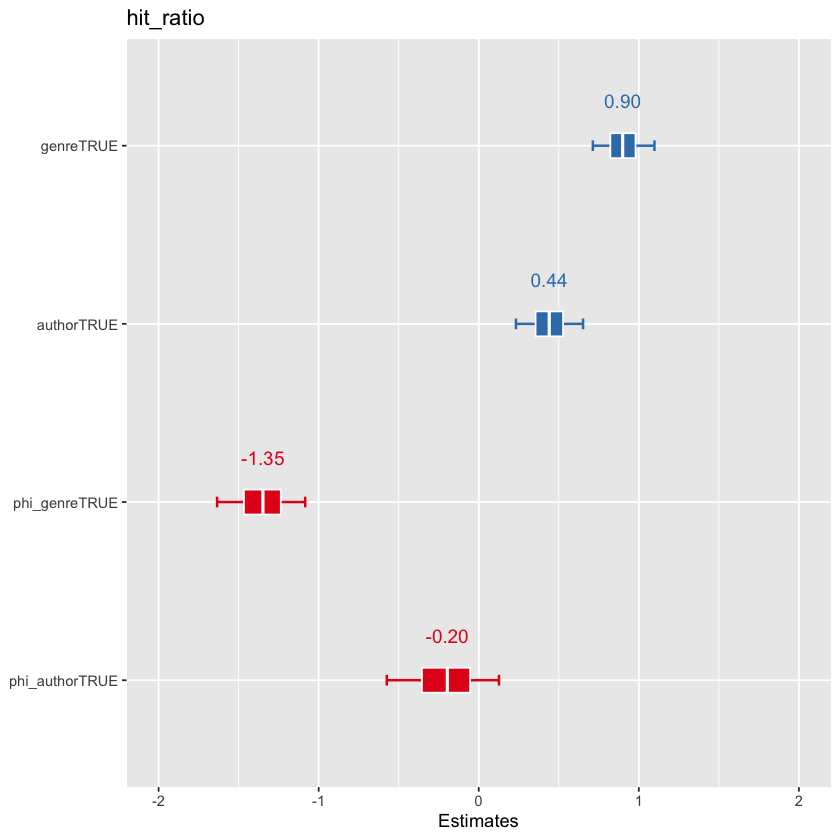

In [13]:
plot_model(covariate, type="est", transform=NULL, show.values=T, terms=c("genreTRUE", "authorTRUE", "phi_genreTRUE", "phi_authorTRUE"))

In [14]:
intercept_only <- add_criterion(intercept_only, 'loo')
author_only <- add_criterion(author_only, 'loo')
genre_only <- add_criterion(genre_only, 'loo')
covariate <- add_criterion(covariate, 'loo')

Warning message:
“Found 1 observations with a pareto_k > 0.7 in model 'intercept_only'. It is recommended to set 'moment_match = TRUE' in order to perform moment matching for problematic observations. ”
Warning message:
“Found 1 observations with a pareto_k > 0.7 in model 'author_only'. It is recommended to set 'moment_match = TRUE' in order to perform moment matching for problematic observations. ”


In [15]:
loo <- loo_compare(intercept_only, author_only, genre_only, covariate, criterion = "loo")
loo

,elpd_diff,se_diff,elpd_loo,se_elpd_loo,p_loo,se_p_loo,looic,se_looic
covariate,0.000000,0.000000,6315.646,81.45018,10.376323,3.526136,-12631.29,162.9004
genre_only,-4.260313,3.668618,6311.386,81.02517,8.237933,3.154974,-12622.77,162.0503
author_only,-49.217542,23.891189,6266.429,87.56773,10.564667,4.873247,-12532.86,175.1355
intercept_only,-54.040542,22.302749,6261.606,86.37198,7.255171,3.717068,-12523.21,172.7440


In [16]:
waic_wts <- model_weights(intercept_only, author_only, genre_only, covariate, weights = "waic")
waic_wts

intercept_only    author_only     genre_only      covariate 
  3.522088e-24   5.861297e-22   1.496234e-02   9.850377e-01